# Importação e preparação dos dados

In [1]:
import pandas as pd

df = pd.read_csv('../dados/acordaos-unicos.csv', sep = '|')
df.head()

,acordao,arquivo,areas,texto
0,297/2016-P,547240.txt,Responsabilidade,TRIBUNAL DE CONTAS DA UNIÃO\tTC 010.084/2015-0...
1,366/2016-P,549518.txt,Finanças Públicas,TRIBUNAL DE CONTAS DA UNIÃO\tTC 005.933/2014-5...
2,944/2016-P,554399.txt,Responsabilidade,TRIBUNAL DE CONTAS DA UNIÃO\tTC 042.038/2012-0...
3,30/2016-P,545010.txt,Direito Processual,TRIBUNAL DE CONTAS DA UNIÃO\tTC 000.742/2014-7...
4,55/2016-P,544046.txt,Pessoal,;-;;Wania Lucia Pasquarelli do NascimentoTCUWa...


In [2]:
df.shape

(9739, 4)

In [3]:
from sklearn.preprocessing import LabelBinarizer

areas = df.groupby(['areas']).groups.keys()
lbArea = LabelBinarizer()
lbArea.fit([x for x in areas])
y = lbArea.transform(df['areas'])
y.shape

(9739, 10)

In [4]:
from keras.preprocessing.text import Tokenizer
import numpy as np

vocabulario = 320000
limite_texto = 40000
dim_vetor = 100

tokenizer = Tokenizer(num_words=vocabulario)
tokenizer.fit_on_texts(df['texto'])

sequences = tokenizer.texts_to_sequences(df['texto'])

word_index = tokenizer.word_index
vocabulario = len(word_index) + 1
print('Found %s unique tokens.' % len(word_index))

Using TensorFlow backend.


Found 318318 unique tokens.


In [5]:
from keras.preprocessing.sequence import pad_sequences

x = pad_sequences(sequences, maxlen=limite_texto)

print('Shape of data tensor:', x.shape)

Shape of data tensor: (9739, 40000)


In [6]:
x.shape, y.shape

((9739, 40000), (9739, 10))

# Treinamento

In [16]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Dense, GlobalMaxPooling1D, Flatten
from keras.optimizers import RMSprop
from keras.layers.core import Dropout

In [7]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Dense, GlobalMaxPooling1D
from keras.optimizers import RMSprop

model = Sequential()
model.add(Embedding(vocabulario, dim_vetor, input_length=x.shape[1]))
model.add(Conv1D(32, 7, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(32, 7, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(),  metrics=["categorical_accuracy"])
model.summary()
history = model.fit(x, y, epochs=20, batch_size=32, validation_split=0.2, verbose=1, shuffle=True)

W0307 20:02:35.340255 140495035713344 deprecation_wrapper.py:119] From /home/leonardo/anaconda3/envs/gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0307 20:02:35.359088 140495035713344 deprecation_wrapper.py:119] From /home/leonardo/anaconda3/envs/gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0307 20:02:35.363623 140495035713344 deprecation_wrapper.py:119] From /home/leonardo/anaconda3/envs/gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0307 20:02:35.402726 140495035713344 deprecation_wrapper.py:119] From /home/leonardo/anaconda3/envs/gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. P

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 40000, 100)        31831900  
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 39994, 32)         22432     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 7998, 32)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 7992, 32)          7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 31,861,862
Trainable params: 31,861,862
Non-trainable params: 0
________________________________________________________________

W0307 20:02:36.303772 140495035713344 deprecation_wrapper.py:119] From /home/leonardo/anaconda3/envs/gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 7791 samples, validate on 1948 samples
Epoch 1/20
7791/7791 [==============================] - 44s 6ms/step - loss: 1.4980 - categorical_accuracy: 0.4981 - val_loss: 1.3055 - val_categorical_accuracy: 0.5678
Epoch 2/20
7791/7791 [==============================] - 42s 5ms/step - loss: 1.0743 - categorical_accuracy: 0.6486 - val_loss: 1.4292 - val_categorical_accuracy: 0.5118
Epoch 3/20
7791/7791 [==============================] - 42s 5ms/step - loss: 0.9143 - categorical_accuracy: 0.6946 - val_loss: 1.2247 - val_categorical_accuracy: 0.6073
Epoch 4/20
7791/7791 [==============================] - 42s 5ms/step - loss: 0.7463 - categorical_accuracy: 0.7595 - val_loss: 1.1927 - val_categorical_accuracy: 0.6022
Epoch 5/20
7791/7791 [==============================] - 42s 5ms/step - loss: 0.5568 - categorical_accuracy: 0.8348 - val_loss: 1.2876 - val_categorical_accuracy: 0.5385
Epoch 6/20
7791/7791 [==============================] - 42s 5ms/step - loss: 0.3681 - categorical_accuracy:

In [9]:
from keras.layers import GRU

model = Sequential()
model.add(Embedding(vocabulario, dim_vetor, input_length=x.shape[1]))
model.add(Conv1D(32, 7, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(32, 7, activation='relu'))
model.add(GRU(256, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(),  metrics=["categorical_accuracy"])
model.summary()
history = model.fit(x, y, epochs=20, batch_size=32, validation_split=0.2, verbose=1, shuffle=True)

W0307 20:16:44.414059 140495035713344 deprecation.py:506] From /home/leonardo/anaconda3/envs/gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 40000, 100)        31831900  
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 39994, 32)         22432     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 7998, 32)          0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 7992, 32)          7200      
_________________________________________________________________
gru_1 (GRU)                  (None, 256)               221952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 32,086,054
Trainable params: 32,086,054
Non-trainable params: 0
________________________________________________________________

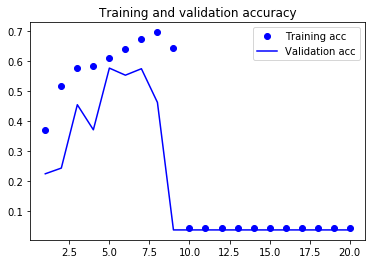

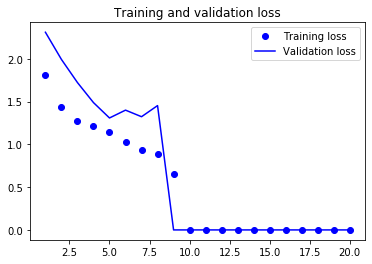

In [10]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
model = Sequential()
model.add(Embedding(vocabulario, dim_vetor, input_length=x.shape[1]))
model.add(Conv1D(32, 7, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(32, 7, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=5e-3),  metrics=["categorical_accuracy"])
model.summary()
history = model.fit(x, y, epochs=20, batch_size=32, validation_split=0.2, verbose=1, shuffle=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 40000, 100)        31831900  
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 39994, 32)         22432     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 7998, 32)          0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 7992, 32)          7200      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 31,861,862
Trainable params: 31,861,862
Non-trainable params: 0
________________________________________________________________

In [12]:
model = Sequential()
model.add(Embedding(vocabulario, dim_vetor, input_length=x.shape[1]))
model.add(Conv1D(32, 7, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(32, 7, activation='relu'))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(),  metrics=["categorical_accuracy"])
model.summary()
history = model.fit(x, y, epochs=20, batch_size=32, validation_split=0.2, verbose=1, shuffle=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 40000, 100)        31831900  
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 39994, 32)         22432     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 7998, 32)          0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 7992, 32)          7200      
_________________________________________________________________
gru_2 (GRU)                  (None, 128)               61824     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 31,924,646
Trainable params: 31,924,646
Non-trainable params: 0
________________________________________________________________

In [13]:
model = Sequential()
model.add(Embedding(vocabulario, dim_vetor, input_length=x.shape[1]))
model.add(Conv1D(64, 7, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(32, 7, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(),  metrics=["categorical_accuracy"])
model.summary()
history = model.fit(x, y, epochs=20, batch_size=32, validation_split=0.2, verbose=1, shuffle=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 40000, 100)        31831900  
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 39994, 64)         44864     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 7998, 64)          0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 7992, 32)          14368     
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 31,891,462
Trainable params: 31,891,462
Non-trainable params: 0
________________________________________________________________

In [14]:
from keras.layers import Flatten
from keras.layers.core import Dropout

model = Sequential()
model.add(Embedding(vocabulario, dim_vetor, input_length=x.shape[1]))
model.add(Conv1D(32, 7, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(),  metrics=["categorical_accuracy"])
model.summary()
history = model.fit(x, y, epochs=20, batch_size=32, validation_split=0.2, verbose=1, shuffle=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 40000, 100)        31831900  
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 39994, 32)         22432     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 7998, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 255936)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65519872  
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2570      
Total para

In [17]:
model = Sequential()
model.add(Embedding(vocabulario, dim_vetor, input_length=x.shape[1]))
model.add(Conv1D(64, 7, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(32, 7, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(),  metrics=["categorical_accuracy"])
model.summary()
history = model.fit(x, y, epochs=20, batch_size=32, validation_split=0.2, verbose=1, shuffle=True)

W0308 20:00:39.377685 140652546336576 deprecation_wrapper.py:119] From /home/leonardo/anaconda3/envs/gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0308 20:00:39.936197 140652546336576 deprecation.py:506] From /home/leonardo/anaconda3/envs/gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0308 20:00:39.967714 140652546336576 deprecation_wrapper.py:119] From /home/leonardo/anaconda3/envs/gpu/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0308 20:00:39.974296 140652546336576 deprecation_wrapper.py

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 40000, 100)        31831900  
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 39994, 64)         44864     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 7998, 64)          0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 7992, 32)          14368     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 1598, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 51136)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               13091072  
__________

In [18]:
model = Sequential()
model.add(Embedding(vocabulario, dim_vetor, input_length=x.shape[1]))
model.add(Conv1D(64, 7, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(32, 7, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(),  metrics=["categorical_accuracy"])
model.summary()
history = model.fit(x, y, epochs=20, batch_size=32, validation_split=0.2, verbose=1, shuffle=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 40000, 100)        31831900  
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 39994, 64)         44864     
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 7998, 64)          0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 7992, 32)          14368     
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 1598, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 51136)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              52364288  
__________

In [19]:
model = Sequential()
model.add(Embedding(vocabulario, dim_vetor, input_length=x.shape[1]))
model.add(Conv1D(32, 7, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(32, 7, activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=5e-3),  metrics=["categorical_accuracy"])
model.summary()
history = model.fit(x, y, epochs=20, batch_size=32, validation_split=0.2, verbose=1, shuffle=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 40000, 100)        31831900  
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 39994, 32)         22432     
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 7998, 32)          0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 7992, 32)          7200      
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 3996, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 127872)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               32735488  
__________